In [91]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [92]:
df = pd.read_csv('/Users/Ajwad/Desktop/NBM_Regression_Gamma/yellow_tripdata_2021-03.csv') # Load tha dataset
df

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2021-03-01 00:22:02,2021-03-01 00:23:22,1.0,0.00,1.0,N,264,264,2.0,3.00,0.50,0.5,0.00,0.00,0.3,4.30,0.0
1,2.0,2021-03-01 00:24:48,2021-03-01 00:24:56,1.0,0.00,1.0,N,152,152,2.0,2.50,0.50,0.5,0.00,0.00,0.3,3.80,0.0
2,2.0,2021-03-01 00:25:17,2021-03-01 00:31:01,1.0,0.00,1.0,N,152,152,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
3,1.0,2021-03-01 00:07:40,2021-03-01 00:31:23,0.0,16.50,4.0,N,138,265,1.0,51.00,0.50,0.5,11.65,6.12,0.3,70.07,0.0
4,2.0,2021-03-01 00:02:13,2021-03-01 00:06:01,1.0,1.13,1.0,N,68,264,1.0,5.50,0.50,0.5,1.86,0.00,0.3,11.16,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925147,NaN,2021-03-29 12:39:29,2021-03-29 13:06:30,NaN,13.18,NaN,NaN,135,75,NaN,34.76,2.75,0.5,0.00,6.12,0.3,44.43,0.0
1925148,NaN,2021-03-29 12:11:00,2021-03-29 12:28:00,NaN,2.60,NaN,NaN,107,163,NaN,18.34,2.75,0.5,0.00,0.00,0.3,21.89,0.0
1925149,NaN,2021-03-29 12:50:00,2021-03-29 13:14:00,NaN,5.50,NaN,NaN,137,17,NaN,37.76,2.75,0.5,0.00,0.00,0.3,41.31,0.0
1925150,NaN,2021-03-29 12:12:00,2021-03-29 12:32:00,NaN,3.78,NaN,NaN,177,85,NaN,-1.55,2.75,0.5,0.00,23.50,0.3,25.50,0.0


In [93]:
df.shape

(1925152, 18)

In [94]:
#X, y = df.drop('total_amount',axis=1), df['total_amount']

#X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
df_train , df_test = train_test_split(df , test_size=.2, random_state=10)

In [95]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=5)
df_train, df_val = train_test_split(df_train, test_size=.25, random_state=5)

In [96]:
df_train.shape

(1155090, 18)

In [97]:
df_train.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155090 entries, 964410 to 36587
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1078366 non-null  float64
 1   tpep_pickup_datetime   1155090 non-null  object 
 2   tpep_dropoff_datetime  1155090 non-null  object 
 3   passenger_count        1078366 non-null  float64
 4   trip_distance          1155090 non-null  float64
 5   RatecodeID             1078366 non-null  float64
 6   store_and_fwd_flag     1078366 non-null  object 
 7   PULocationID           1155090 non-null  int64  
 8   DOLocationID           1155090 non-null  int64  
 9   payment_type           1078366 non-null  float64
 10  fare_amount            1155090 non-null  float64
 11  extra                  1155090 non-null  float64
 12  mta_tax                1155090 non-null  float64
 13  tip_amount             1155090 non-null  float64
 14  tolls_amount   

In [99]:
nulls = df_train.isnull().sum().to_frame()# (to_frame():Convert Series to DataFrame),(sum():To sum the number of missing values),(isnull()to detect missing values)
nulls.columns = ["Missing values"] 
nulls

,Missing values
VendorID,76724
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,76724
trip_distance,0
RatecodeID,76724
store_and_fwd_flag,76724
PULocationID,0
DOLocationID,0
payment_type,76724


In [100]:
df_train = df_train.dropna(how ='any')

In [101]:
nulls = df_train.isnull().sum().to_frame()# (to_frame():Convert Series to DataFrame),(sum():To sum the number of missing values),(isnull()to detect missing values)
nulls.columns = ["Missing values"] 
nulls

,Missing values
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [102]:
df_train.drop(['store_and_fwd_flag', 'PULocationID','DOLocationID','congestion_surcharge'],axis=1, inplace=True ) # delete two columns ,(axis=1:refers to column dimension)

In [103]:
df_train.shape

(1078366, 14)

In [109]:
#Day = df_train["tpep_pickup_datetime"].dt.day
#df_train['Day'] = Day # add new column to dataframe
#df_train
df_date = pd.to_datetime(df_train['tpep_pickup_datetime'] ,errors = 'coerce',format='%Y-%m-%d %H:%M:%S').dt.strftime("%d")
df_date

964410     17
1602218    28
1502881    26
570508     11
1374167    24
           ..
1245787    22
1409311    25
1092821    19
1629764    29
36587      01
Name: tpep_pickup_datetime, Length: 1078366, dtype: object

In [111]:
df_train['Day'] = df_date # add new column to dataframe
df_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Day
964410,2.0,2021-03-17 23:23:57,2021-03-17 23:28:16,1.0,1.92,1.0,1.0,7.0,0.5,0.5,1.50,0.0,0.3,12.30,17
1602218,1.0,2021-03-28 15:28:23,2021-03-28 15:33:27,3.0,1.10,1.0,1.0,6.0,2.5,0.5,1.00,0.0,0.3,10.30,28
1502881,2.0,2021-03-26 19:42:37,2021-03-26 20:01:13,1.0,2.19,1.0,2.0,13.5,1.0,0.5,0.00,0.0,0.3,17.80,26
570508,2.0,2021-03-11 12:16:29,2021-03-11 12:31:32,1.0,2.02,1.0,1.0,11.0,0.0,0.5,2.86,0.0,0.3,17.16,11
1374167,2.0,2021-03-24 19:03:46,2021-03-24 19:13:03,1.0,2.38,1.0,1.0,9.5,1.0,0.5,2.76,0.0,0.3,16.56,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245787,2.0,2021-03-22 18:15:08,2021-03-22 18:22:35,1.0,1.59,1.0,1.0,7.5,1.0,0.5,1.00,0.0,0.3,12.80,22
1409311,1.0,2021-03-25 13:33:35,2021-03-25 13:52:50,1.0,6.70,1.0,1.0,22.5,2.5,0.5,5.15,0.0,0.3,30.95,25
1092821,2.0,2021-03-19 20:19:08,2021-03-19 20:26:36,1.0,1.27,1.0,1.0,7.0,0.5,0.5,2.70,0.0,0.3,13.50,19
1629764,1.0,2021-03-29 10:18:41,2021-03-29 10:30:52,1.0,2.60,1.0,2.0,11.5,2.5,0.5,0.00,0.0,0.3,14.80,29


In [130]:
df_train1 = df_train.drop(df_train[df_train.Day < '20' ].index)
df_train1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Day
1602218,1.0,2021-03-28 15:28:23,2021-03-28 15:33:27,3.0,1.10,1.0,1.0,6.0,2.5,0.5,1.00,0.0,0.3,10.30,28
1502881,2.0,2021-03-26 19:42:37,2021-03-26 20:01:13,1.0,2.19,1.0,2.0,13.5,1.0,0.5,0.00,0.0,0.3,17.80,26
1374167,2.0,2021-03-24 19:03:46,2021-03-24 19:13:03,1.0,2.38,1.0,1.0,9.5,1.0,0.5,2.76,0.0,0.3,16.56,24
1398315,2.0,2021-03-25 11:28:54,2021-03-25 11:32:21,1.0,0.86,1.0,1.0,5.0,0.0,0.5,1.66,0.0,0.3,9.96,25
1201170,2.0,2021-03-21 22:19:23,2021-03-21 22:31:40,2.0,2.88,1.0,1.0,12.0,0.5,0.5,3.95,0.0,0.3,19.75,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118566,2.0,2021-03-20 12:25:12,2021-03-20 12:36:04,1.0,1.83,1.0,1.0,9.0,0.0,0.5,2.46,0.0,0.3,14.76,20
1455407,2.0,2021-03-26 09:19:16,2021-03-26 09:28:55,2.0,1.54,1.0,1.0,8.5,0.0,0.5,2.95,0.0,0.3,14.75,26
1245787,2.0,2021-03-22 18:15:08,2021-03-22 18:22:35,1.0,1.59,1.0,1.0,7.5,1.0,0.5,1.00,0.0,0.3,12.80,22
1409311,1.0,2021-03-25 13:33:35,2021-03-25 13:52:50,1.0,6.70,1.0,1.0,22.5,2.5,0.5,5.15,0.0,0.3,30.95,25


In [122]:
df_train1.shape

(416891, 15)

In [123]:
df_train1.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
VendorID,1.000000,0.176008,0.022056,0.001712,-0.018284,-0.001624,-0.863068,-0.035309,0.020827,0.000151,-0.049132,0.001773
passenger_count,0.176008,1.000000,0.018140,-0.003550,-0.002334,0.013013,-0.147442,0.009074,0.007364,0.008259,0.006809,0.014284
trip_distance,0.022056,0.018140,1.000000,0.128960,-0.006005,0.876858,-0.020763,-0.009187,0.398943,0.492458,0.018782,0.865080
RatecodeID,0.001712,-0.003550,0.128960,1.000000,0.007462,0.204193,-0.023872,-0.150691,0.107244,0.148057,-0.024865,0.202521
payment_type,-0.018284,-0.002334,-0.006005,0.007462,1.000000,-0.049485,-0.032719,-0.279846,-0.488192,-0.017673,-0.305975,-0.153630
fare_amount,-0.001624,0.013013,0.876858,0.204193,-0.049485,1.000000,-0.019696,0.050010,0.418893,0.496322,0.144811,0.976609
extra,-0.863068,-0.147442,-0.020763,-0.023872,-0.032719,-0.019696,1.000000,0.087153,0.019748,-0.010509,0.081532,0.012239
mta_tax,-0.035309,0.009074,-0.009187,-0.150691,-0.279846,0.050010,0.087153,1.000000,0.020983,-0.056958,0.909781,0.080446
tip_amount,0.020827,0.007364,0.398943,0.107244,-0.488192,0.418893,0.019748,0.020983,1.000000,0.311239,0.063153,0.578181
tolls_amount,0.000151,0.008259,0.492458,0.148057,-0.017673,0.496322,-0.010509,-0.056958,0.311239,1.000000,0.021055,0.572042


In [ ]:
sns.pairplot(df_train1);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'VendorID'),
  Text(1, 0, 'passenger_count'),
  Text(2, 0, 'trip_distance'),
  Text(3, 0, 'RatecodeID'),
  Text(4, 0, 'payment_type'),
  Text(5, 0, 'fare_amount'),
  Text(6, 0, 'extra'),
  Text(7, 0, 'mta_tax'),
  Text(8, 0, 'tip_amount'),
  Text(9, 0, 'tolls_amount'),
  Text(10, 0, 'improvement_surcharge'),
  Text(11, 0, 'total_amount')])

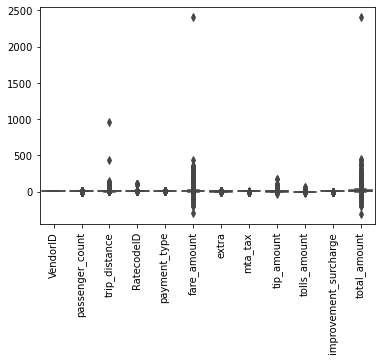

In [133]:
sns.boxplot(data=df_train1);
plt.xticks(rotation = 90)